# Read the data 

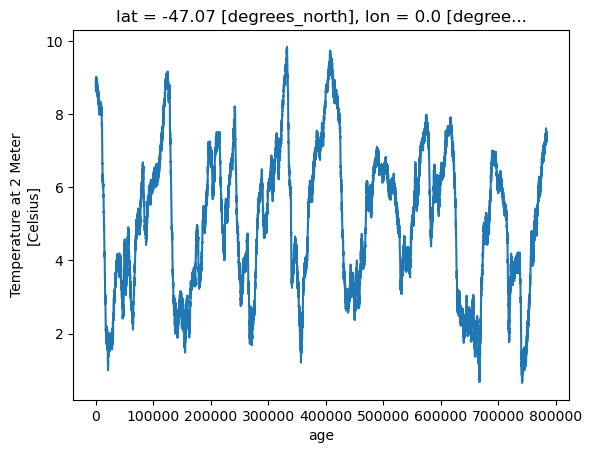

In [2]:
import xarray as xr

# import .nc data
ds = xr.open_dataset('D:/VScode/Last_deglaciation/loveclim_data/loveclim_784k_atm.nc')

ds
# rename the TREFHT to sat
ds = ds.rename({'t2m': 'sat'})
# rename the time to age
ds = ds.rename({'mtime': 'age'})
# # multiply age by 1000
ds['age'] = ds['age'] * 1000

ds

# # # convert the sat to degrees C
# # ds['sat'] = ds['sat'] - 273.15

ds = ds[['sat']]
ds

# plot a record from the ds_sat at given lat and lon
ds['sat'].isel(lat=7, lon=0).plot()

ds_sat=ds




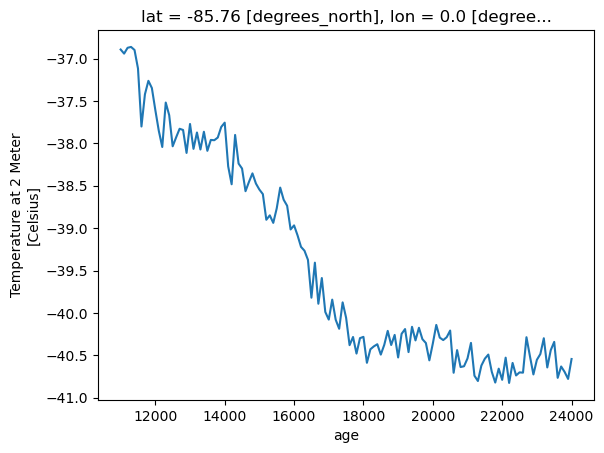

In [3]:
ds_sat = ds_sat.sel(age=slice(24000, 11000))
ds_sat['sat'].isel(lat=0, lon=0).plot()

# PCA

shape of the weight: (32,)
shape of the reshaped sat_centered_weighted: (131, 2048)


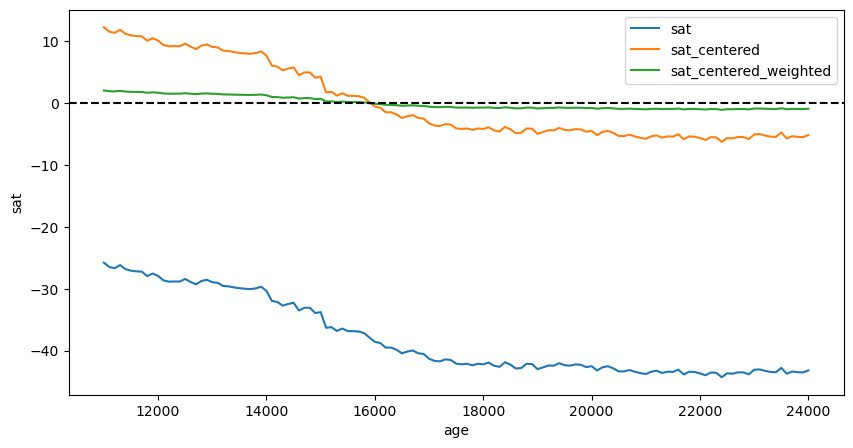

In [4]:
from toolbox import PCA_functions as pf
# 1. Center the Data
ds_sat = pf.center_data(ds_sat)

# 2. Weight the Data
ds_sat = pf.apply_weighting(ds_sat)

# 3. Plot the Centered and Weighted Data
# Assuming you want to plot data for lat=0 and lon=0
lat_index = 30
lon_index = 50
pf.plot_sat_variables(ds_sat, lat_index, lon_index)


In [5]:
from toolbox import PCA_functions as pf
# 4. Perform PCA
exp_variance, eofs, pcs = pf.sat_PCA(ds_sat)
print('Explained variance:', exp_variance)


shape of the reshaped sat_centered_weighted: (2048, 131)
shape of u, s, vh: (2048, 2048) (131,) (131, 131)
shape of EOFs: (2048, 2)
shape of PCs: (131, 2)
Explained variance: [9.72108543e-01 1.00360671e-02 5.90046449e-03 2.25376920e-03
 1.53092644e-03 9.95847862e-04 8.91418371e-04 6.51615439e-04
 4.20782279e-04 4.11474379e-04 3.26299662e-04 3.04904330e-04
 2.53706297e-04 2.17495995e-04 2.13143663e-04 1.94788299e-04
 1.77583628e-04 1.56667491e-04 1.44253892e-04 1.38596821e-04
 1.33953305e-04 1.27283638e-04 1.13888033e-04 1.05766470e-04
 9.85170045e-05 9.52901901e-05 8.89990042e-05 7.98203473e-05
 7.58756069e-05 7.38354065e-05 7.03894839e-05 6.63694591e-05
 6.34551398e-05 5.90755044e-05 5.57847197e-05 5.31824699e-05
 5.04247946e-05 4.91838364e-05 4.66158199e-05 4.34415815e-05
 4.21912773e-05 4.04144885e-05 3.93402515e-05 3.82117651e-05
 3.53941250e-05 3.28967726e-05 3.18300736e-05 3.08164927e-05
 3.05901085e-05 3.00275788e-05 2.78306925e-05 2.75353977e-05
 2.61270361e-05 2.45515967e-05 2

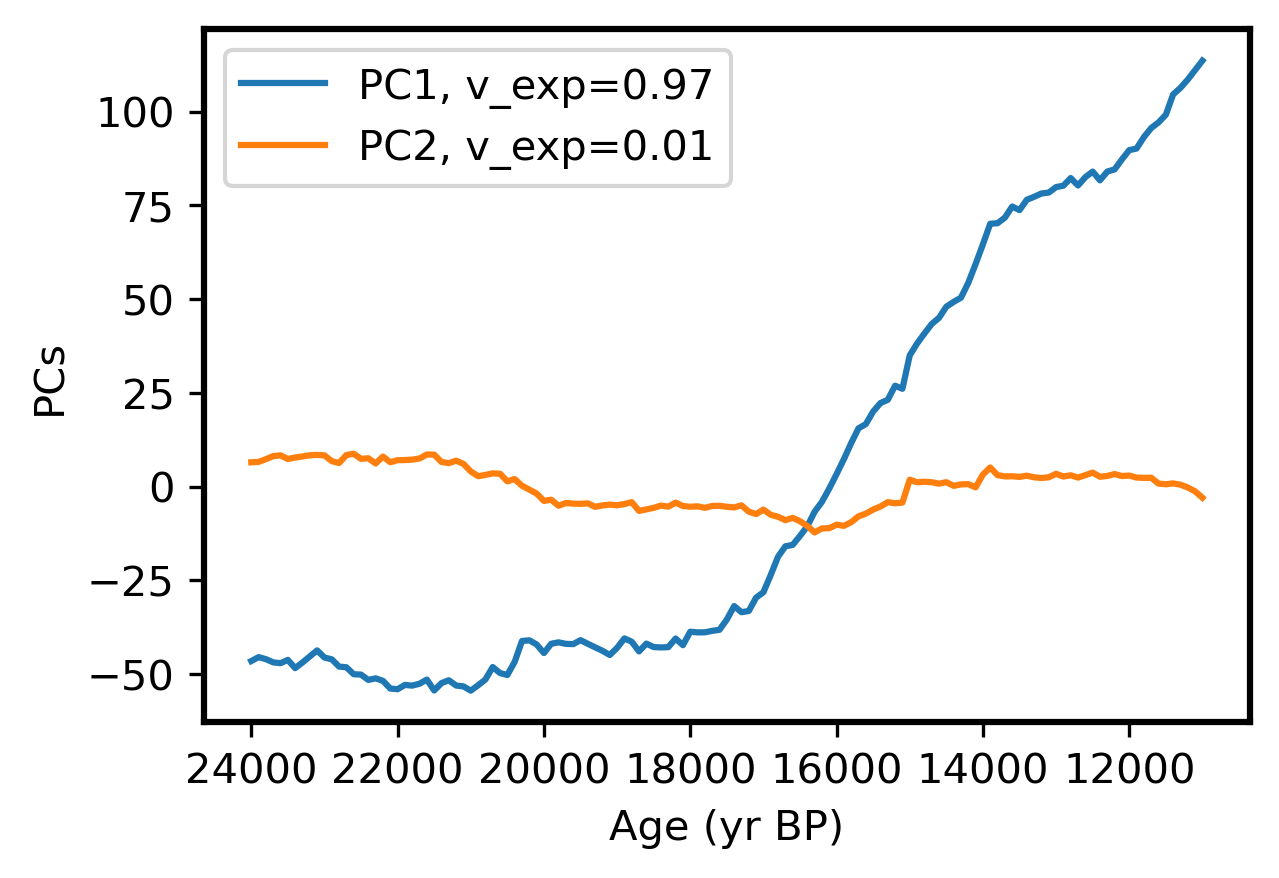

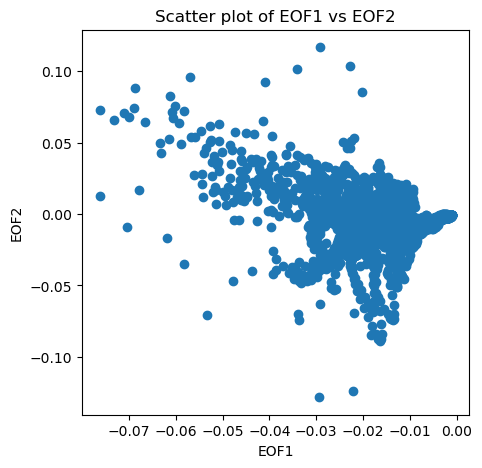

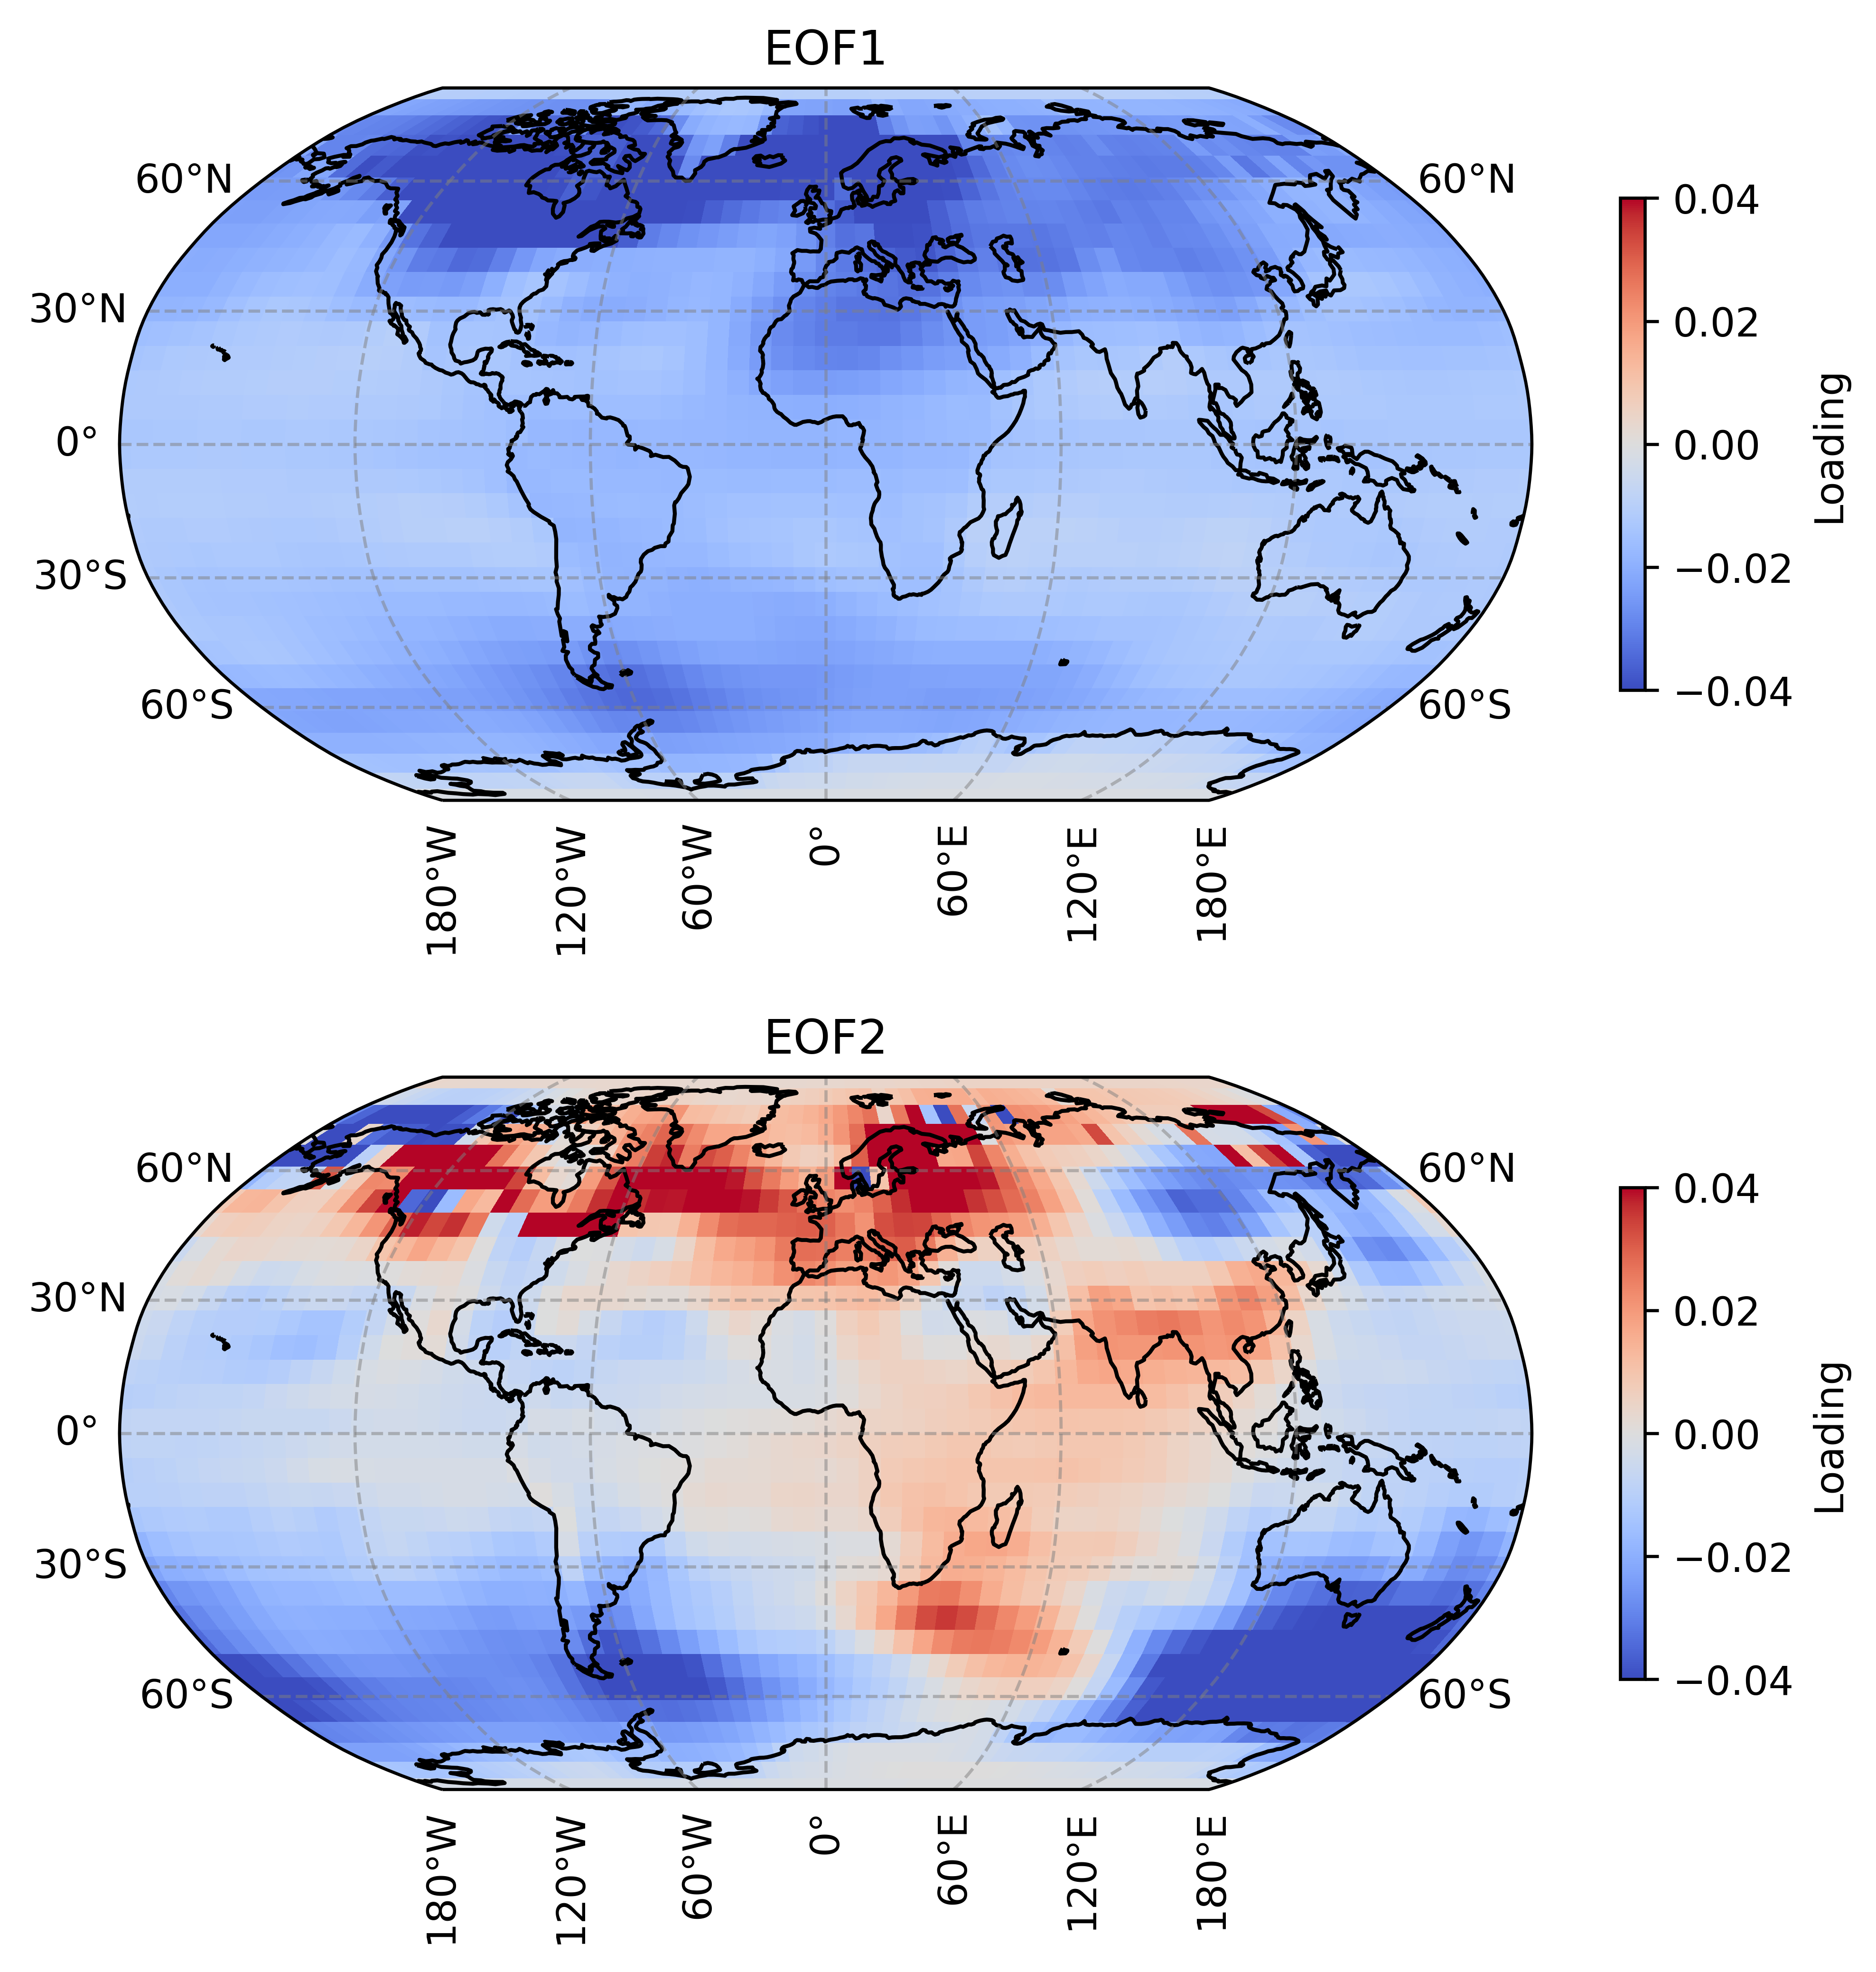

(<Figure size 4800x5400 with 4 Axes>,
 array([<GeoAxes: title={'center': 'EOF1'}>,
        <GeoAxes: title={'center': 'EOF2'}>], dtype=object))

In [6]:
# 5. Plot PCs
pf.plot_pcs(ds_sat['age'].values, pcs, exp_variance)

# 6. Plot EOF Scatter
pf.plot_eof_scatter(eofs)

# 7. Plot the EOF Map
pf.plot_eof_map(eofs, ds_sat['lat'].values, ds_sat['lon'].values)

# GMM

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


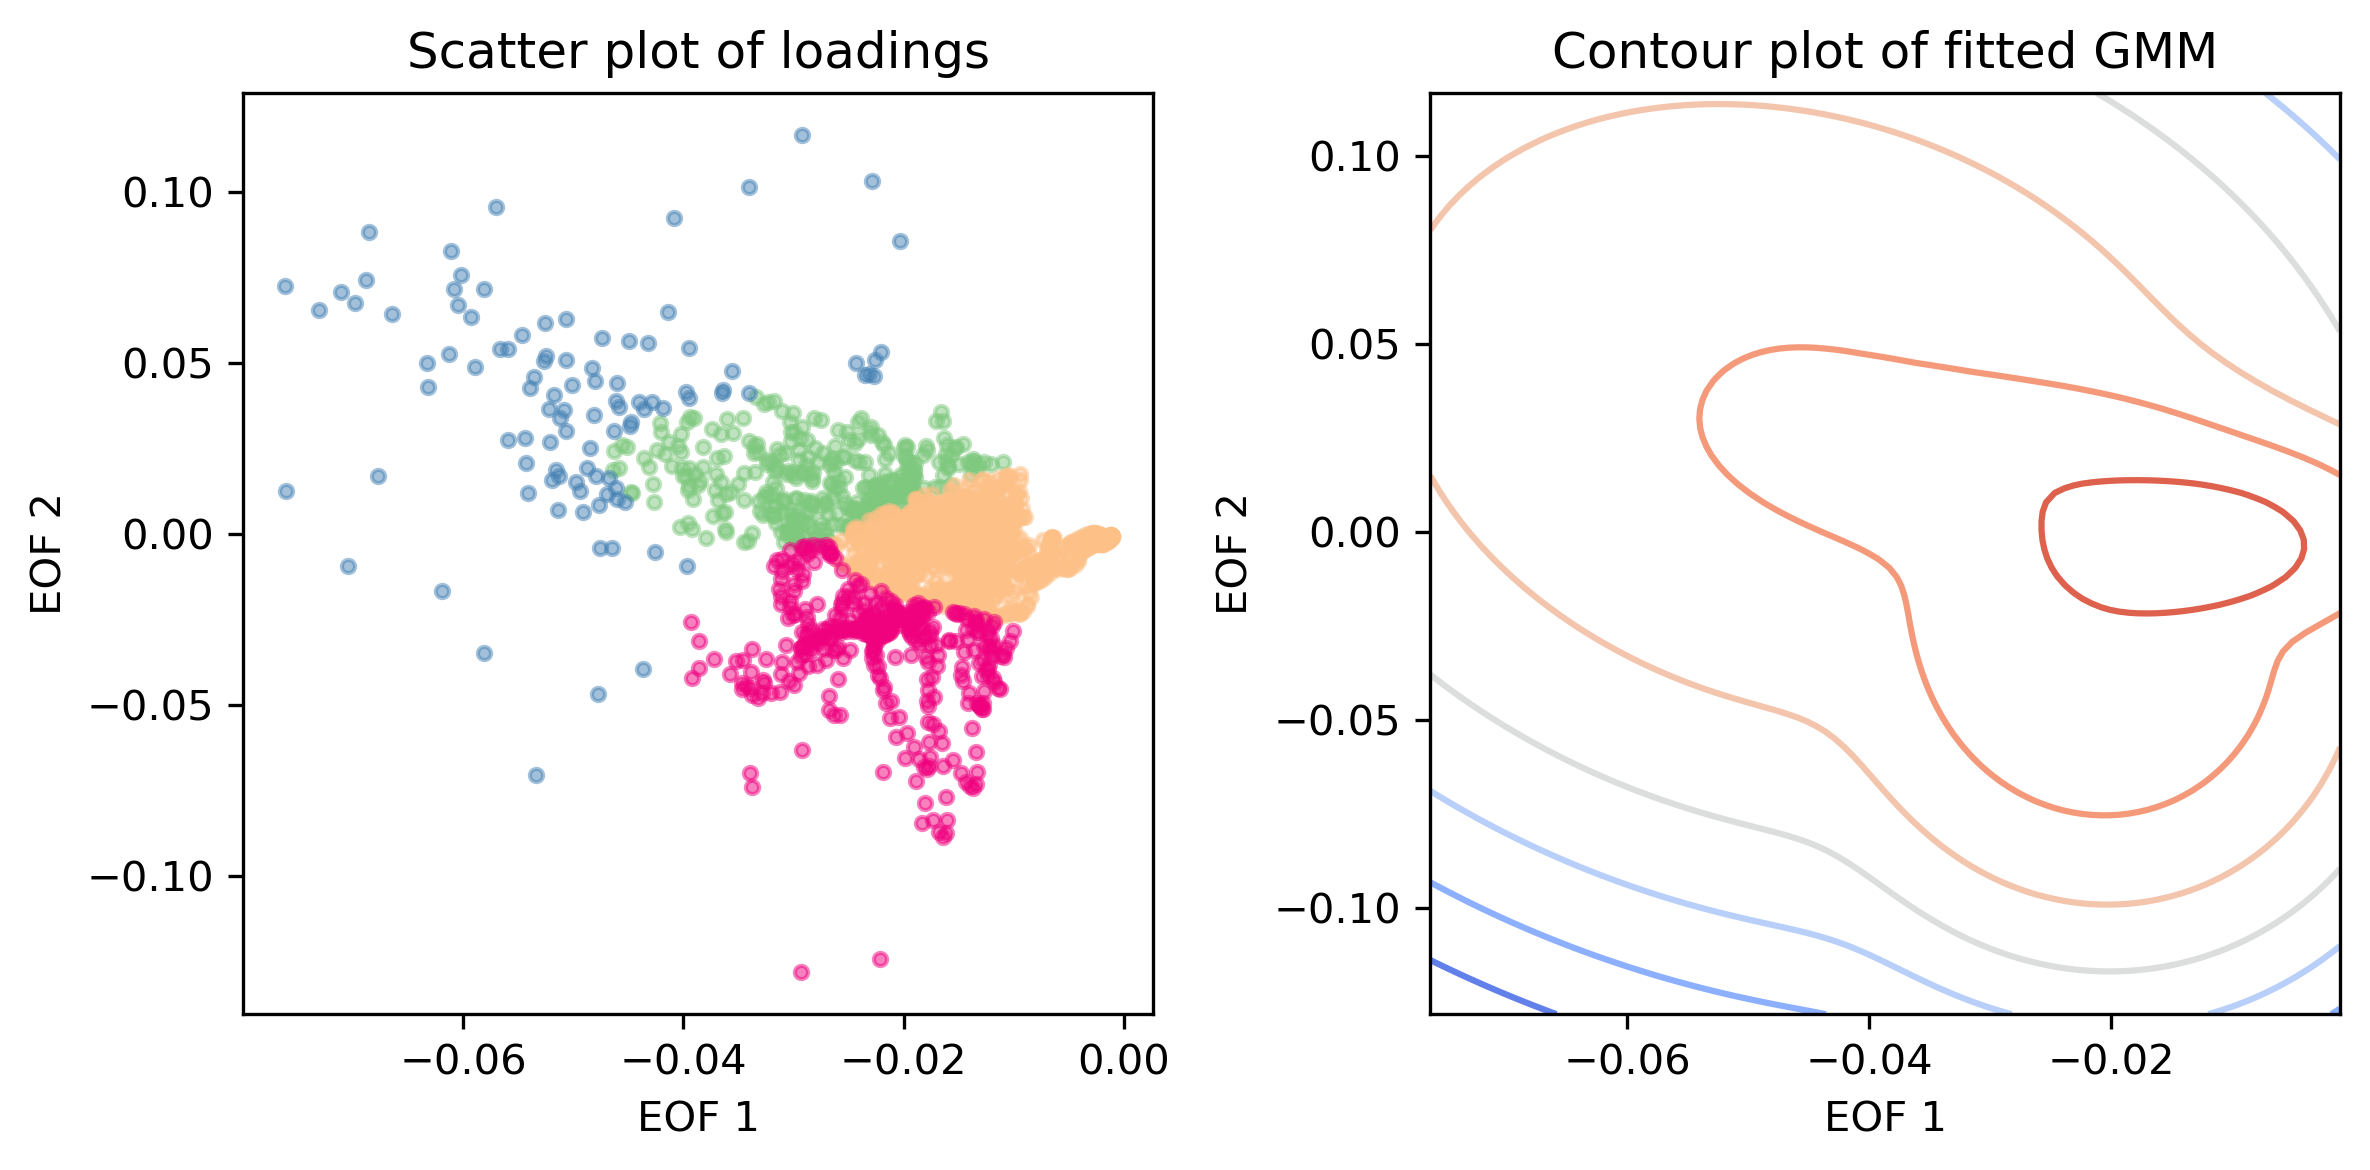

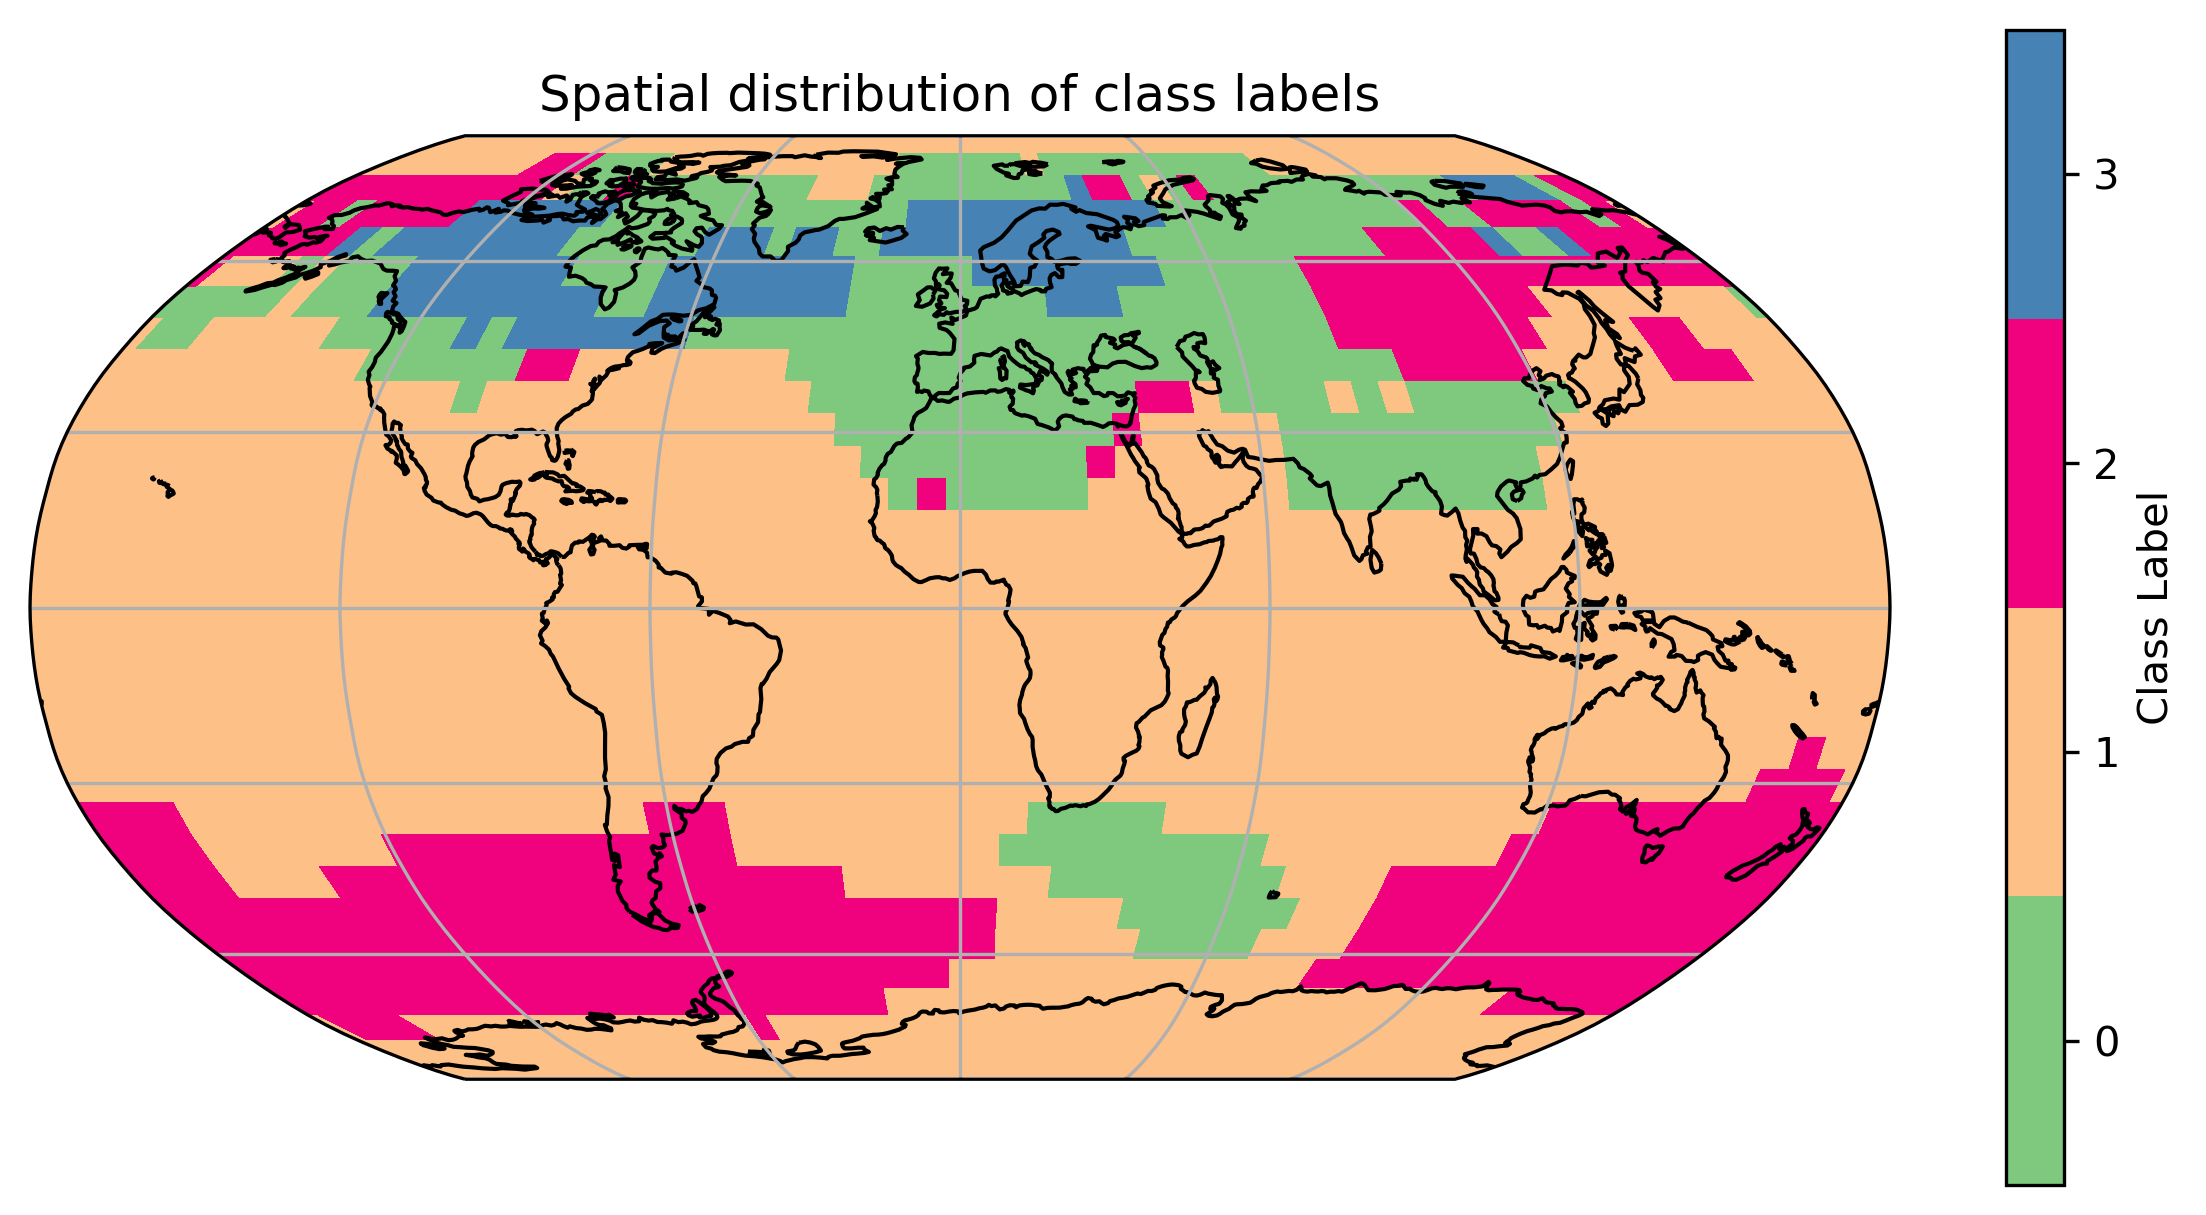

In [7]:
from toolbox import GMM_functions as gf
import importlib
importlib.reload(gf)

ds_loveclim_EOFs_GMM,reshaped_probs=gf.GMM4EOFS(eofs, ds_sat,n_components=4,init_params='kmeans')
gf.plot_labels(ds_loveclim_EOFs_GMM)

In [8]:
from toolbox import GMM_functions as gf
import importlib
importlib.reload(gf) 

uncor_weighted_avg=gf.plot_weighted_average_curve(ds_loveclim_EOFs_GMM.copy(), dpi=900)